Name: Zicheng Xie    UTS Student ID: 14527131

In [1]:
#Initial environment setup and module import 
path = '/home/aq/下载/others/AQR质量因子/'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
from datetime import datetime
import apmodule as ap
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 10 
plt.rcParams['lines.linewidth'] = 3
%matplotlib inline

In [2]:
#summarize IC statistics for multiple factors and present them in a tabular format, and to summarize the cumulative returns of an indicator (presumably IC - related) on an annual basis, converting the results into percentages and presenting them in a transposed DataFrame.
def summarize_IC(rank_ic,factors):
    '''
    Summarize the results of IC statistics
    '''
    summary_ic = []
    ic_ts = pd.DataFrame()
    
    for factor in factors:
        temp = rank_ic.query(f'factor=="{factor}"').sort_values(by='section')
        ic_mean = temp['IC'].mean()
        ic_std = temp['IC'].std()
        ir = ic_mean / ic_std
        pvalue_mean = temp['pvalue'].mean()
        summary_ic.append([factor,ic_mean,ic_std,ir,pvalue_mean])
        ts = temp['IC']
        ts.name = factor
        ts.index = temp['section']
        ic_ts = pd.concat([ic_ts,ts],axis=1)
        
    summary_ic = pd.DataFrame(summary_ic,columns=['factor','IC_mean','IC_std','ICIR','Pvalue_mean'])
    return summary_ic,ic_ts

def cum_year_ret(ret_dataframe):
    '''
    Summarize IC (presumably an indicator) by year
    '''
    temp = ret_dataframe.copy()
    temp.index = pd.to_datetime(temp.index)
    # Grouped by year
    year_ret_summary = pd.DataFrame()
    grouped = temp.groupby(temp.index.year)
    for group in grouped:
        year_ret = group[1].cumsum().apply(np.exp)
        year_ret = year_ret.iloc[len(year_ret)-1,:] - 1
        year_ret.name = group[0]
        year_ret_summary = pd.concat([year_ret_summary,year_ret],axis=1)
    year_ret_summary = year_ret_summary * 100
    return year_ret_summary.T

In [3]:
# load the data
growth = pd.read_csv(path+'GROWTH.csv').set_index(['id','date'])
market_cap = pd.read_csv(path+'Market_cap.csv').set_index(['id','date'])
names = pd.read_csv(path+'names.csv')
prices = pd.read_csv(path+'Prices.csv').set_index(['id','date'])
profit = pd.read_csv(path+'PROFIT.csv').set_index(['id','date'])
quality = pd.read_csv(path+'QUALITY.csv').set_index(['id','date'])
safety = pd.read_csv(path+'SAFETY.csv').set_index(['id','date'])

# 2. Statistical Analysis
This section primarily calculates the Information Coefficients (ICs) of the 'quality' factor and its three component factors.

(1) Based on the following summary results of the ICs, the average ICs of the four factors on a monthly cross - section are all greater than 0.03. Among them, the 'quality' factor, which is a composite of the three component factors, exhibits the best IC performance, with an average IC of 0.0458. However, it's notable that the standard deviation of its IC is relatively large, exceeding those of the three component factors. The 'quality' factor is constructed by equally weighting the three component factors. Its IC series shows a high linear correlation with the IC series of the three component factors, and there is also a certain degree of correlation among the component factors themselves, with the IC correlations between the component factors all exceeding 0.5. There are also slight differences among the three component factors. The 'safety' factor has the highest IC but also greater factor volatility, while the 'growth' factor has the lowest IC but better factor stability.

(2) The cumulative IC plot indicates that the factor performs well in the time - series dimension. By examining the average ICs for each year, it can be seen that the worst - performing year for the factor was 2009, during which all three of its component factors were ineffective. However, after the financial crisis and the market's return to a normal state, the factor's performance became relatively stable. Perhaps due to the increasing number of quantitative investors, the factor has become more crowded, leading to a certain weakening of its returns and predictive ability. Nevertheless, from the IC series, the signs of this weakening are not obvious, and there is no clear evidence to prove that the factor has become ineffective.

In [4]:
month_ret = prices.unstack().T   #Unstack the 'prices' DataFrame, which likely has a multi - level index, and then transpose it.
month_ret = month_ret.pct_change(fill_method=None).unstack().T   # Calculate the percentage change of the data in'month_ret'
month_ret.columns = ['RET']
db = pd.concat([quality,growth,profit,safety,month_ret],axis=1)
db = db.dropna(subset=['quality'],axis=0)
db = db.reset_index()
db.iloc[:,2:].describe().T

,count,mean,std,min,25%,50%,75%,max
quality,652353.0,3.043137e-15,1.000000,-6.132243,-0.608424,0.038396,0.677833,3.334571
growth,652353.0,1.382072e-02,0.991523,-3.971933,-0.587068,0.145336,0.711582,2.388708
profit,652353.0,2.477911e-01,0.653038,-5.665396,-0.110476,0.262270,0.656641,3.282973
safety,652353.0,8.553072e-03,0.941070,-3.954088,-0.627943,-0.006272,0.668290,3.692792
RET,586230.0,1.313253e-02,0.150815,-0.981295,-0.053812,0.004828,0.068182,24.000000


In [5]:
db

,id,date,quality,growth,profit,safety,RET
0,10001,1996-07-31,-0.383315,0.127166,-0.153983,-0.436650,0.023437
1,10001,1996-08-30,-0.383161,0.130252,-0.153591,-0.439835,0.038168
2,10001,1996-09-30,-0.867538,-0.090037,-0.586794,-0.713398,0.041765
3,10001,1996-10-31,-0.868512,-0.092971,-0.586848,-0.712274,-0.028571
4,10001,1996-11-29,-0.871250,-0.093602,-0.586992,-0.716739,0.029412
...,...,...,...,...,...,...,...
652348,93427,2022-08-31,1.225948,0.877814,-0.126855,1.865567,NaN
652349,93427,2022-09-30,1.227387,0.879150,-0.124128,1.864259,NaN
652350,93427,2022-10-31,1.231077,0.880710,-0.127031,1.872663,NaN
652351,93427,2022-11-30,1.250178,0.879823,-0.122697,1.905774,NaN


In [6]:
factors = db.columns[2:-1] # Extract the names of factors from the 'db' DataFrame, excluding the first two and the last columns.
# Get unique dates from the 'date' column in 'db' and sort them.
datelist = db['date'].unique()
datelist.sort()
result = []
# Iterate through each date in the sorted date list.
for section in datelist:
    section_data = db.query(f'date=="{section}"')
    for factor in factors:
        temp = pd.concat([section_data[factor],section_data['RET']],axis=1).dropna()
        corr,pvalue = ss.spearmanr(temp[factor],temp['RET'])
        result.append([section,factor,corr,pvalue])

rank_ic = pd.DataFrame(result,columns=['section','factor','IC','pvalue'])
db = db.set_index(['id','date'])

In [7]:
rank_ic

,section,factor,IC,pvalue
0,1980-01-31,quality,-0.143198,0.000027
1,1980-01-31,growth,-0.094833,0.005545
2,1980-01-31,profit,-0.152912,0.000007
3,1980-01-31,safety,-0.070677,0.038925
4,1980-02-29,quality,0.032374,0.344132
...,...,...,...,...
2059,2022-11-30,safety,0.051555,0.096413
2060,2022-12-30,quality,0.094015,0.002429
2061,2022-12-30,growth,0.097342,0.001690
2062,2022-12-30,profit,0.021038,0.498376


In [8]:
#Summary Results of Information Coefficient (IC) 
summary_ic,ic_ts = summarize_IC(rank_ic,factors)
summary_ic

,factor,IC_mean,IC_std,ICIR,Pvalue_mean
0,quality,0.045769,0.083476,0.548287,0.192544
1,growth,0.030081,0.063566,0.473234,0.240334
2,profit,0.035029,0.066473,0.526961,0.220424
3,safety,0.037453,0.080705,0.464078,0.237297


In [9]:
ic_ts

,quality,growth,profit,safety
1980-01-31,-0.143198,-0.094833,-0.152912,-0.070677
1980-02-29,0.032374,0.024648,0.050425,0.011354
1980-03-31,0.251405,0.099122,0.156185,0.238520
1980-04-30,0.080608,0.046305,0.138374,0.016147
1980-05-30,0.022288,0.018215,0.041148,-0.002867
...,...,...,...,...
2022-08-31,-0.087077,-0.071054,-0.135837,-0.044357
2022-09-30,0.247802,0.114718,0.157365,0.248516
2022-10-31,0.014472,0.058607,0.051561,-0.064456
2022-11-30,0.124813,0.103851,0.106930,0.051555


<Axes: title={'center': 'Cumsum Value of IC'}>

<Figure size 640x480 with 0 Axes>

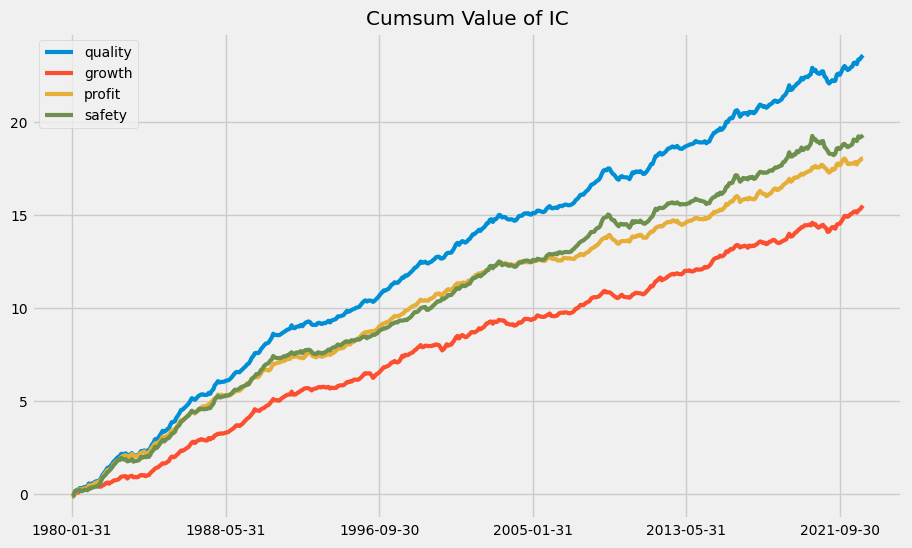

In [10]:
#Cumulative Value of Information Coefficient (IC)
fig = plt.figure()
ic_ts.cumsum().plot(figsize=(10,6),
                    title='Cumsum Value of IC')

<Axes: title={'center': 'Cumsum Value of IC'}>

<Figure size 640x480 with 0 Axes>

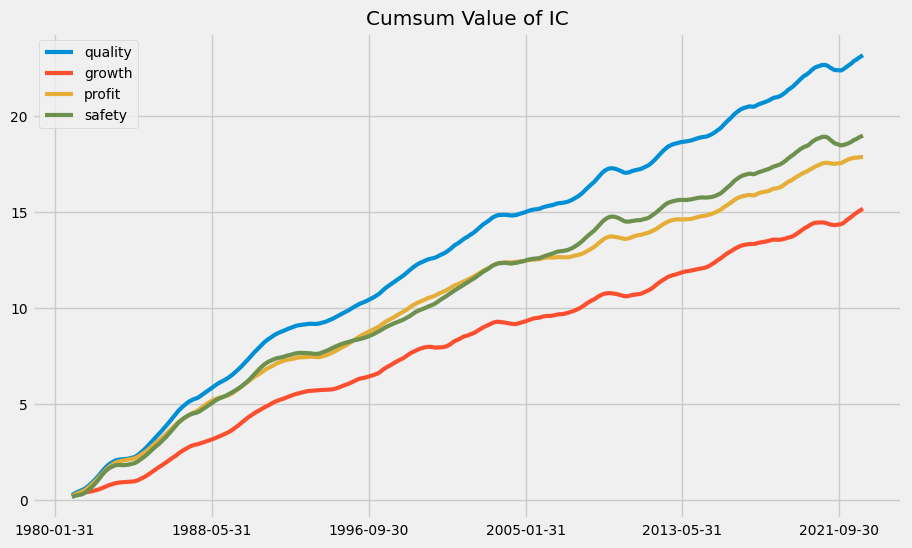

In [11]:
# Rolling 12 - month Smoothed Curve of the Cumulative Value of Information Coefficient (IC) 
fig = plt.figure()
ic_ts.cumsum().rolling(12).mean().plot(figsize=(10,6),
                                      title='Cumsum Value of IC')

In [12]:
#Annual Mean of Information Coefficient (IC)
ic_ts['year'] = ic_ts.index
ic_ts['year'] = ic_ts['year'].apply(lambda x:x.split('-')[0])
ic_ts.groupby(ic_ts['year']).mean()

,quality,growth,profit,safety
year,,,,
1980,0.048374,0.041463,0.039834,0.025823
1981,0.069905,0.011310,0.068358,0.073082
1982,0.065125,0.028402,0.066463,0.058796
1983,0.013282,0.004329,0.017424,0.010419
1984,0.087989,0.053103,0.065702,0.075104
1985,0.093145,0.057306,0.074701,0.082331
1986,0.065349,0.046767,0.045179,0.058766
1987,0.063738,0.028370,0.069204,0.056356
1988,0.041094,0.037756,0.018762,0.027276


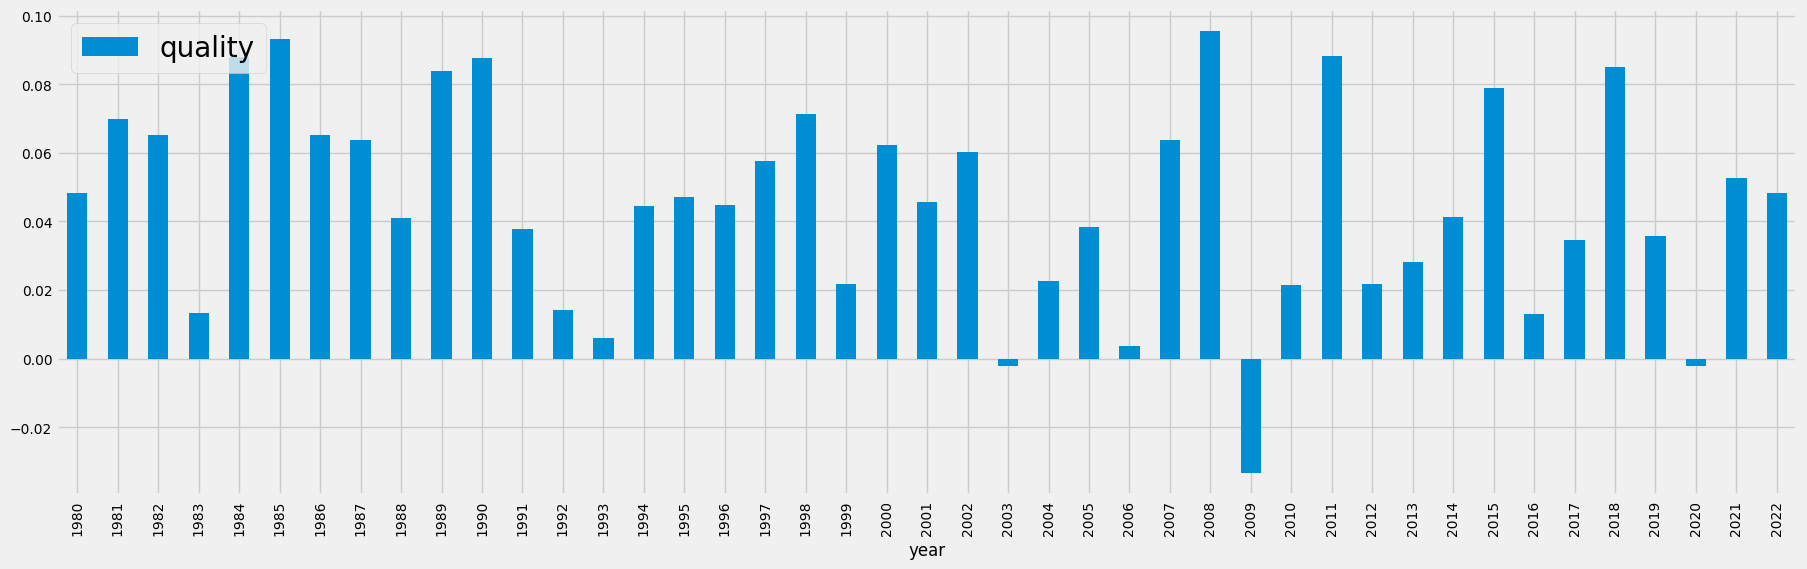

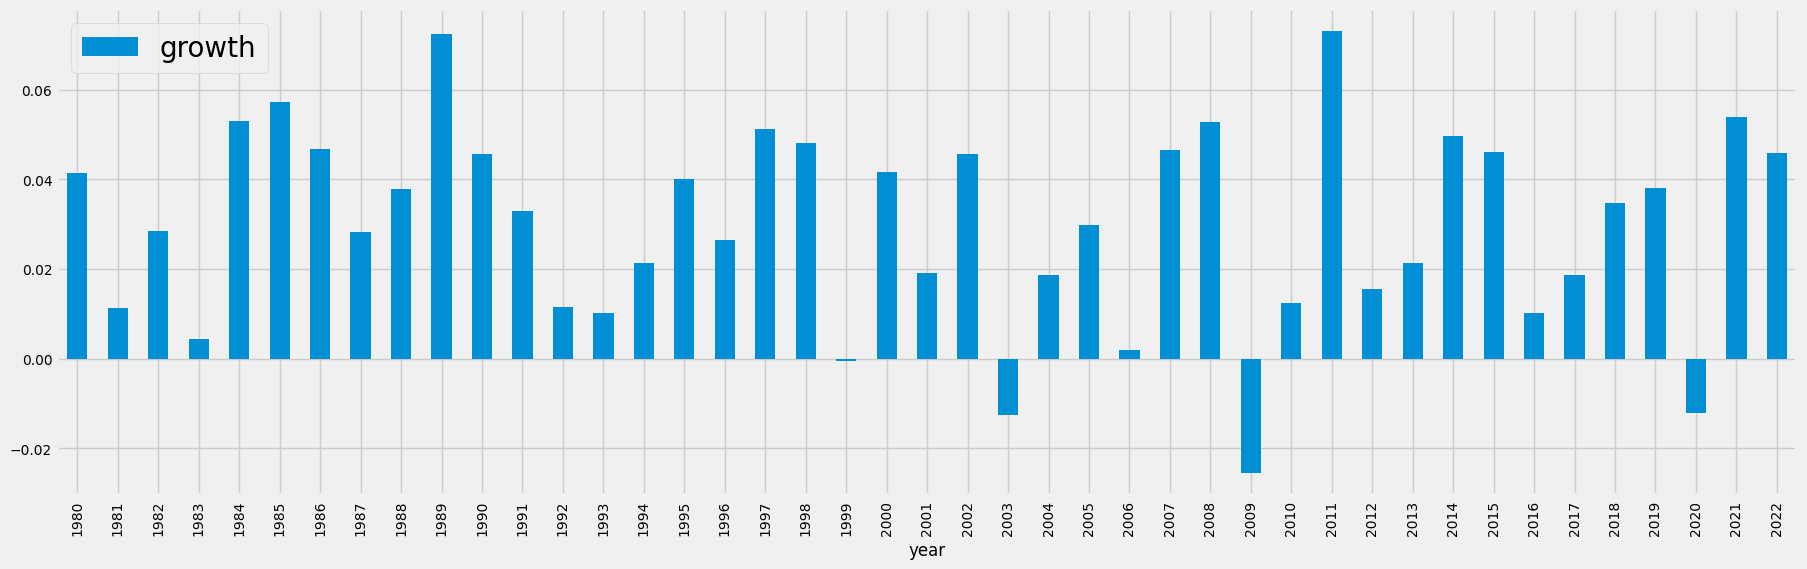

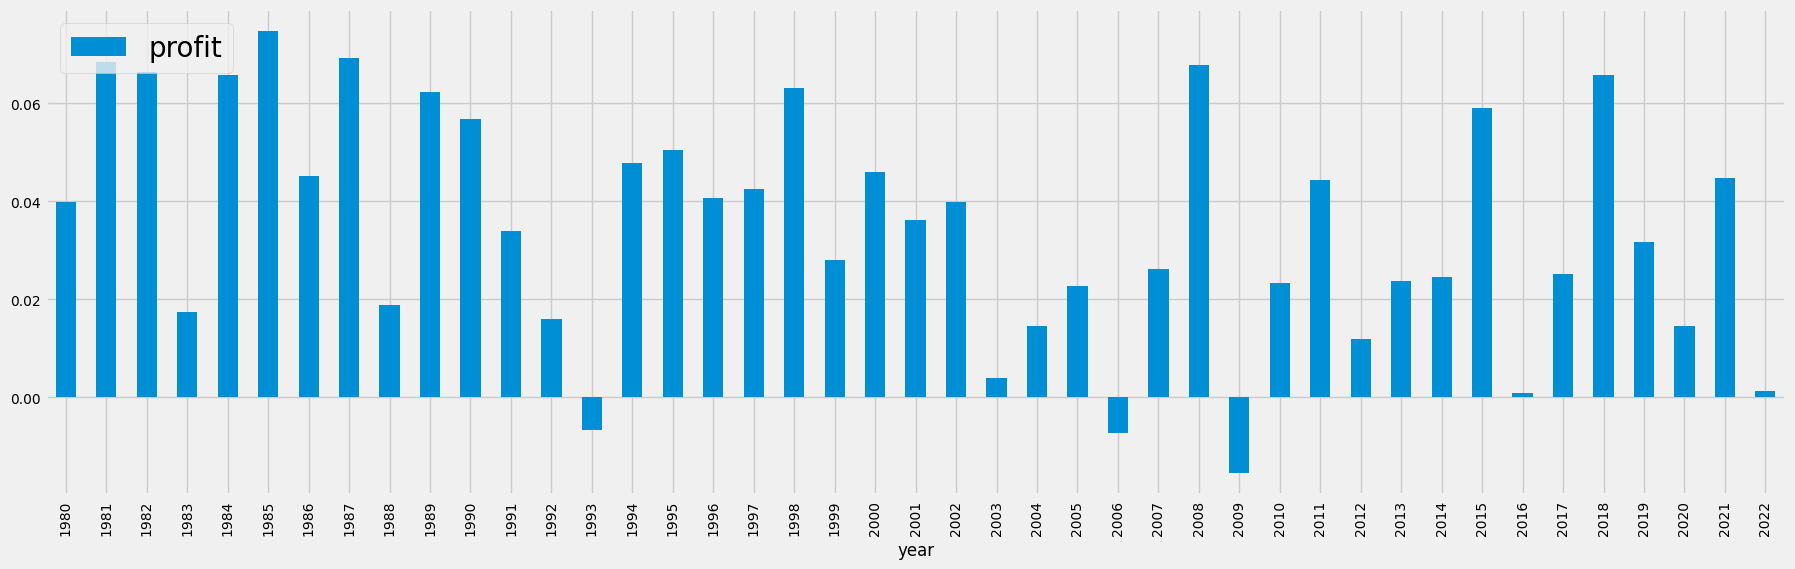

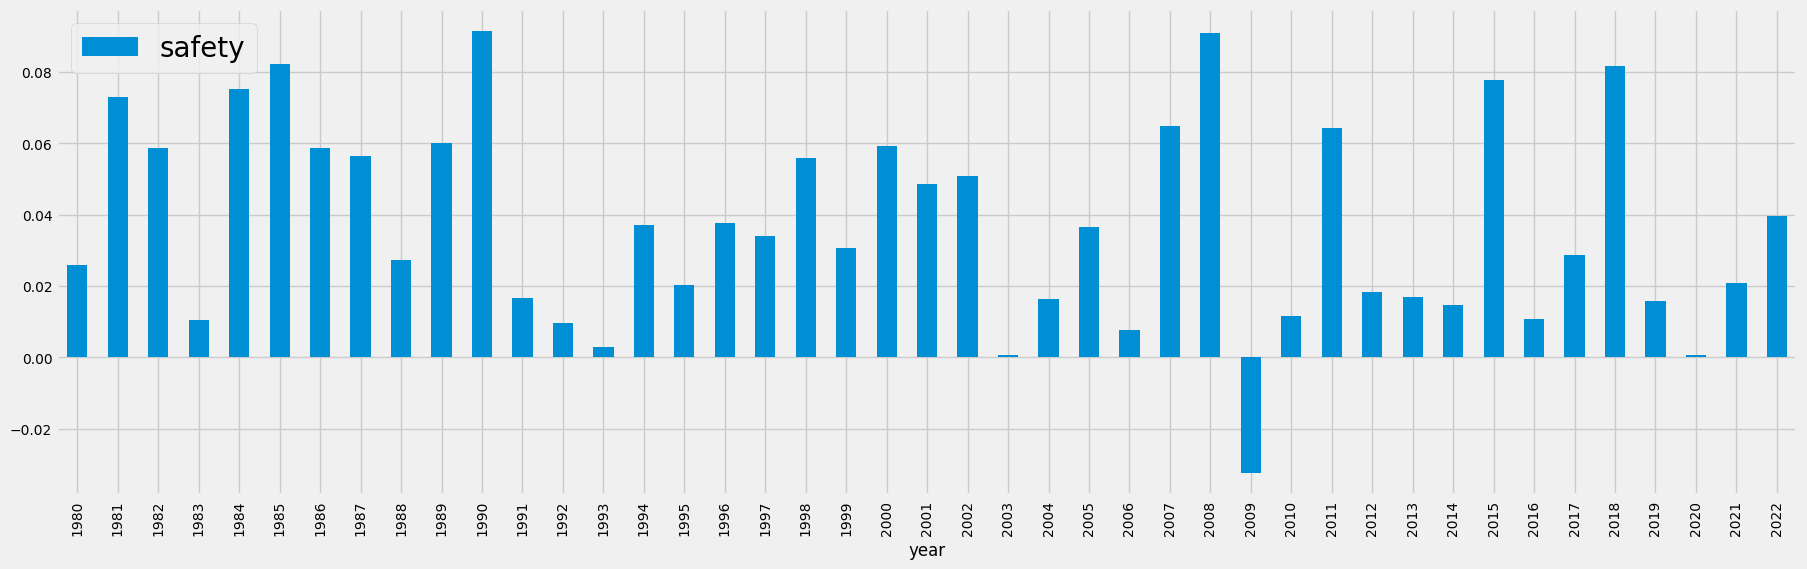

In [13]:
#Time series of monthly IC averages in years.
for factor in factors:
    fig = plt.figure()
    ic_ts[factor].groupby(ic_ts['year']).mean().plot(kind='bar',figsize=(20,6))
    plt.legend([factor],loc='upper left',fontsize=20)

In [14]:
#Correlation coefficient between factors IC
corr_df = ic_ts.iloc[:,:-1].corr()
corr_df

,quality,growth,profit,safety
quality,1.000000,0.836507,0.850745,0.895193
growth,0.836507,1.000000,0.646089,0.558145
profit,0.850745,0.646089,1.000000,0.682899
safety,0.895193,0.558145,0.682899,1.000000


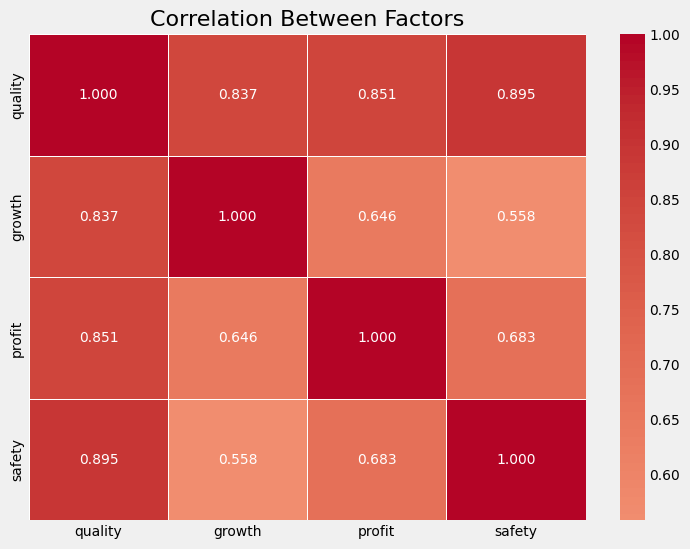

In [18]:
#visualization of the data
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True, fmt='.3f', cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Between Factors', fontsize=16)
plt.show()

# 3. Backtesting

The strategy was backtested according to the requirements, and to demonstrate its performance across different periods, we summarized the strategy's returns for various years. Special attention was given to the three-year period from 2020 to 2022:

2020: The benchmark achieved positive returns, and while the Long-Short (LS) portfolio also generated positive returns, it failed to outperform the benchmark.

2021: The investment portfolio slightly outperformed the benchmark, achieving a marginal advantage in returns.

2022: Neither the investment portfolio nor the benchmark delivered positive returns; however, the investment portfolio demonstrated strong risk-resistance capabilities, performing relatively better in a challenging market environment.

In [19]:
ls_ret, ls_turn, ls_comp, ls_perf = ap.ls_backtesting(db['quality'], prices['price'], market_cap['market_cap'], 
                                                      start='2005-01-01', end='2022-12-31', 
                                                      frequency=1, t_cost=0.002, N=250, active=0.3)

ls_perf

,LS Portfolio,Benchmark,LS Active
Mean Return,0.104364,0.072373,0.031991
St. Dev.,0.137200,0.148094,0.035084
RR Ratio,0.760668,0.488697,0.911838
% Positive,0.648148,0.652778,0.634259
Worst Month,-0.140865,-0.186403,-0.037991
Best Month,0.106777,0.109407,0.045538
Max DrawDown,-0.455186,-0.608699,-0.120379


<Axes: title={'center': 'Long-Short vs Benchmark vs LS Active'}, xlabel='Time', ylabel='Portfolio Value'>

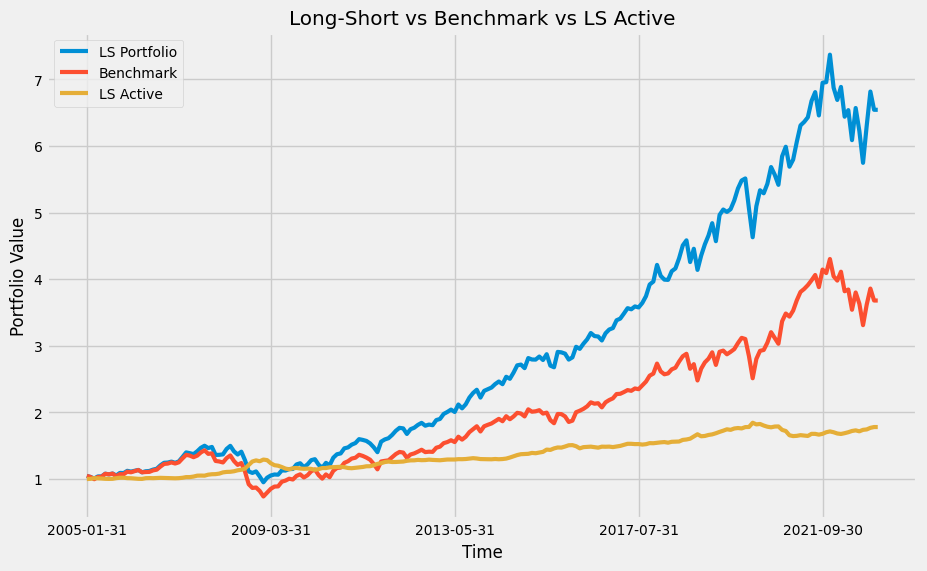

In [20]:
#We can now plot them together
port_values = ls_ret.cumsum().apply(np.exp)

port_values.plot(figsize=(10,6),
                 title='Long-Short vs Benchmark vs LS Active',
                 ylabel='Portfolio Value',
                 xlabel='Time')

In [21]:
year_ret_summary = cum_year_ret(ls_ret)
year_ret_summary

,LS Portfolio,Benchmark,LS Active
2005,12.099017,10.861170,1.116574
2006,12.343256,12.529200,-0.165240
2007,8.006289,1.761424,6.136770
2008,-23.872425,-35.517550,18.059371
2009,13.564228,24.751125,-8.967372
2010,25.238950,23.892244,1.086998
2011,12.769194,4.727769,7.678408
2012,13.427460,10.817490,2.355196
2013,17.922545,16.573702,1.157073
2014,19.891073,13.226868,5.885710


<Axes: title={'center': 'Returns For Each Year'}, xlabel='Year', ylabel='Returns%'>

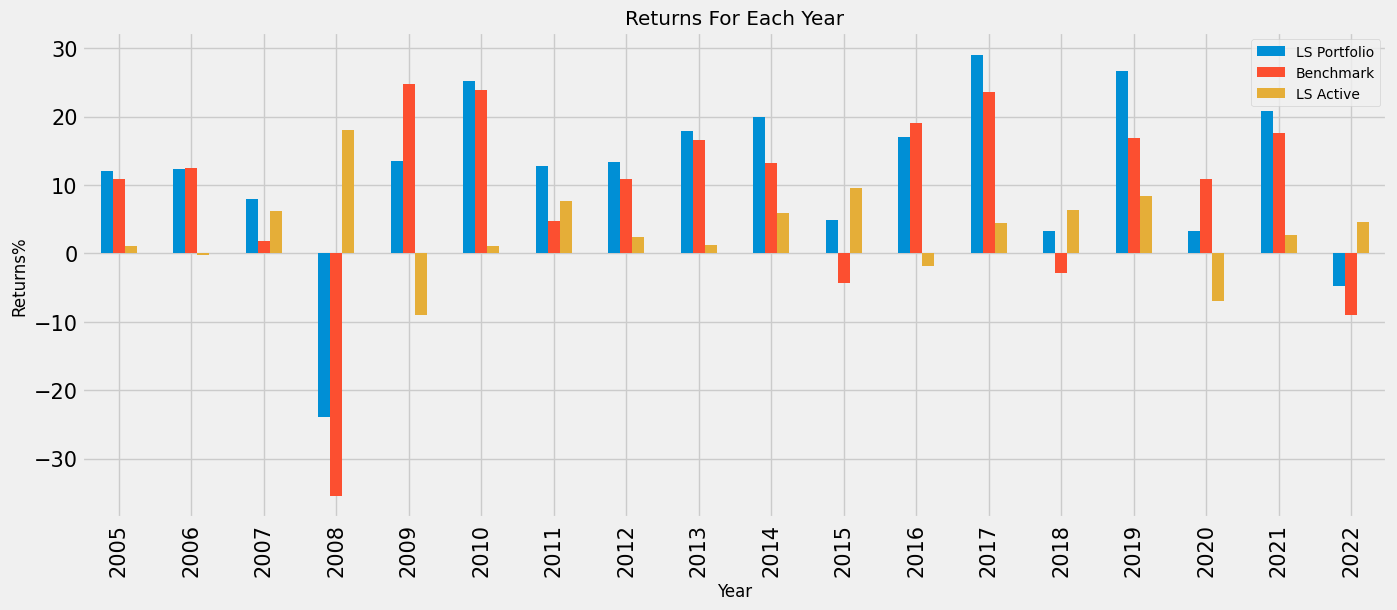

In [22]:
#Plot the 'year_ret_summary' DataFrame as a bar chart
year_ret_summary.plot(kind='bar',
                      figsize=(15,6),
                      title='Returns For Each Year',
                      fontsize=15,
                      ylabel='Returns%',
                      xlabel='Year',
                      )

# 4.Optimization

In [23]:
# We respectively set the values of `active_levels` to 0.1, 0.3, and 0.5, and the values of `share_numbers` to 150, 250, and 350. 
# The backtesting was carried out, and the summary results are as follows: 
active_levels = [0.1, 0.3, 0.5]
share_numbers = [150, 250, 350]

result = pd.DataFrame()
ret_summary = pd.DataFrame()
for level in active_levels:
    for number in share_numbers:     
        lx_ret, lx_turn, lx_comp, lx_perf = ap.ls_backtesting(db['quality'], prices['price'], market_cap['market_cap'], 
                                                          start='2005-01-01', end='2022-12-31', 
                                                          frequency=1, t_cost=0.002, N=number, active=level)

        name = 'active:%.1f'%level + ' ' + 'N:%d'%number
        temp_perf = lx_perf['LS Active']
        temp_perf.index = [x+'(LS Active)' for x in temp_perf.index]
        temp_perf.name = name
        result = pd.concat([result,temp_perf],axis=1)

        temp_ret = lx_ret['LS Active']
        temp_ret.name = name
        ret_summary = pd.concat([ret_summary,temp_ret],axis=1)
result = result.applymap(lambda x:'%.4f'%x)
result

/tmp/ipykernel_4173/3583783321.py:21: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  result = result.applymap(lambda x:'%.4f'%x)


,active:0.1 N:150,active:0.1 N:250,active:0.1 N:350,active:0.3 N:150,active:0.3 N:250,active:0.3 N:350,active:0.5 N:150,active:0.5 N:250,active:0.5 N:350
Mean Return(LS Active),0.0136,0.0105,0.0088,0.0414,0.0320,0.0269,0.0690,0.0534,0.0449
St. Dev.(LS Active),0.0137,0.0117,0.0099,0.0411,0.0351,0.0295,0.0684,0.0585,0.0492
RR Ratio(LS Active),0.9950,0.8968,0.8931,1.0075,0.9118,0.9113,1.0086,0.9135,0.9135
% Positive(LS Active),0.6389,0.6250,0.6481,0.6435,0.6343,0.6481,0.6435,0.6343,0.6481
Worst Month(LS Active),-0.0160,-0.0127,-0.0099,-0.0477,-0.0380,-0.0294,-0.0795,-0.0633,-0.0490
Best Month(LS Active),0.0162,0.0152,0.0118,0.0487,0.0455,0.0354,0.0812,0.0759,0.0590
Max DrawDown(LS Active),-0.0452,-0.0403,-0.0333,-0.1352,-0.1204,-0.0996,-0.2252,-0.2005,-0.1658


<Axes: title={'center': 'PF Value Of Each Parameter '}, xlabel='Time', ylabel='Portfolio Value'>

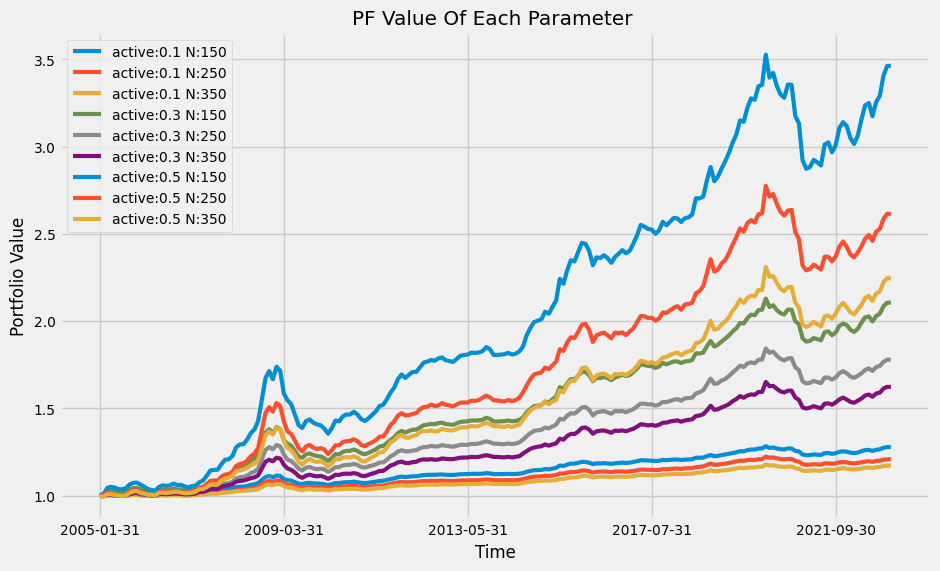

In [24]:
#Investment Portfolio Curves under Different Parameter Values
port_values = ret_summary.cumsum().apply(np.exp)

port_values.plot(figsize=(10,6),
                 title='PF Value Of Each Parameter ',
                 ylabel='Portfolio Value',
                 xlabel='Time')

# 5.Predictive power and the Economic Environment
Since the IC sequence of factors reflects the correlation between factors and future expected returns, i.e., the time-series representation of their predictive power, this section primarily analyzes the relationship between the IC sequence and macroeconomic indicators. Subsequently, data is grouped based on IC performance under different conditions, and a t-test is conducted to examine whether there are significant differences in the corresponding macroeconomic indicators when the quality factor performs differently.

Among the four macroeconomic indicators, inflation rate and unemployment rate are the primary bases for the Federal Reserve's interest rate policy decisions, while the yields of 10-year and 1-year Treasury bonds are influenced by the interest rate environment. Among these, the inflation rate reacts more sensitively to changes in interest rates, so there is a very high linear correlation between the inflation rate, the 10-year Treasury yield, and the 1-year Treasury yield. Therefore, the association between quality and these three indicators, as well as the results of the subsequent t-tests, show a high degree of consistency.

For the t-test, the following design was adopted: the quality factor was divided into two groups based on IC performance—Poor (poor-performing data) and Good (good-performing data). According to traditional quantitative finance views, if we use 0.02 as the threshold to distinguish good or bad factors, it can be observed that INFL (inflation), 10YTR (10-year Treasury yield), 1YTR (1-year Treasury yield), and UNRATE (unemployment rate) pass the test at a significance level of 0.05. This indicates that when quality performs well or poorly, it corresponds to different interest rate environments, especially for the 10YTR and 1YTR indicators, which are more sensitive. At a significance level of 0.01, 1YTR even passes the test at a significance level of 0.005. In the Poor group, the mean value of 1YTR is 3.698%, while in the Good group, its mean value is 4.884%. This factor clearly demonstrates the stock-bond seesaw effect. When the threshold for evaluating the performance of quality is lowered from 0.02 to 0 (i.e., when the IC of quality is less than 0, indicating that the factor has completely failed in this cross-section), using the same method for the t-test yields even more significant results. However, regardless of the threshold, no strong correlation was found between quality and UMCSENT (consumer sentiment index).

In [25]:
#Read the macroeconomic data and process the time format
macro = pd.read_csv(path+'Macro.csv',index_col='DATE')
macro.index = [datetime.strptime(x,'%d/%m/%Y') for x in macro.index]
macro.index = [datetime.strftime(x,'%Y-%m-%d') for x in macro.index]
macro.head()

,INFL,10YTR,1YTR,UNRATE,UMCSENT,Unnamed: 6,Unnamed: 7
1978-01-31,6.40809,7.96,7.28,6.4,83.7,NaN,NaN
1978-02-28,6.19765,8.03,7.34,6.3,84.3,NaN,NaN
1978-03-31,6.33333,8.04,7.31,6.3,78.8,NaN,NaN
1978-04-30,6.63350,8.15,7.45,6.1,81.6,NaN,NaN
1978-05-31,6.76568,8.35,7.82,6.0,82.9,NaN,NaN


In [26]:
#Add the values of the quality factor to the data
macro_df = pd.DataFrame(ic_ts['quality'])
for i in macro.columns[:5]:
    macro_df[i] = macro[i]
macro_df

,quality,INFL,10YTR,1YTR,UNRATE,UMCSENT
1980-01-31,-0.143198,11.97080,10.80,12.06,6.3,67.0
1980-02-29,0.032374,11.99422,12.41,13.92,6.3,66.9
1980-03-31,0.251405,12.60745,12.75,15.82,6.3,56.5
1980-04-30,0.080608,13.08677,11.47,13.30,6.9,52.7
1980-05-30,0.022288,13.13559,10.18,9.39,7.5,51.7
...,...,...,...,...,...,...
2022-08-31,-0.087077,6.30050,2.90,3.28,3.7,58.2
2022-09-30,0.247802,6.64296,3.52,3.89,3.5,58.6
2022-10-31,0.014472,6.30176,3.98,4.43,3.7,59.9
2022-11-30,0.124813,5.97198,3.89,4.73,3.6,56.8


In [27]:
#The Correlation between Quality and Macroeconomic Indicators
corr_df = macro_df.corr()
corr_df

,quality,INFL,10YTR,1YTR,UNRATE,UMCSENT
quality,1.000000,0.120984,0.131061,0.149496,-0.128981,0.015538
INFL,0.120984,1.000000,0.734860,0.779764,0.167833,-0.366474
10YTR,0.131061,0.734860,1.000000,0.959922,0.281686,0.009919
1YTR,0.149496,0.779764,0.959922,1.000000,0.130012,0.052075
UNRATE,-0.128981,0.167833,0.281686,0.130012,1.000000,-0.500569
UMCSENT,0.015538,-0.366474,0.009919,0.052075,-0.500569,1.000000


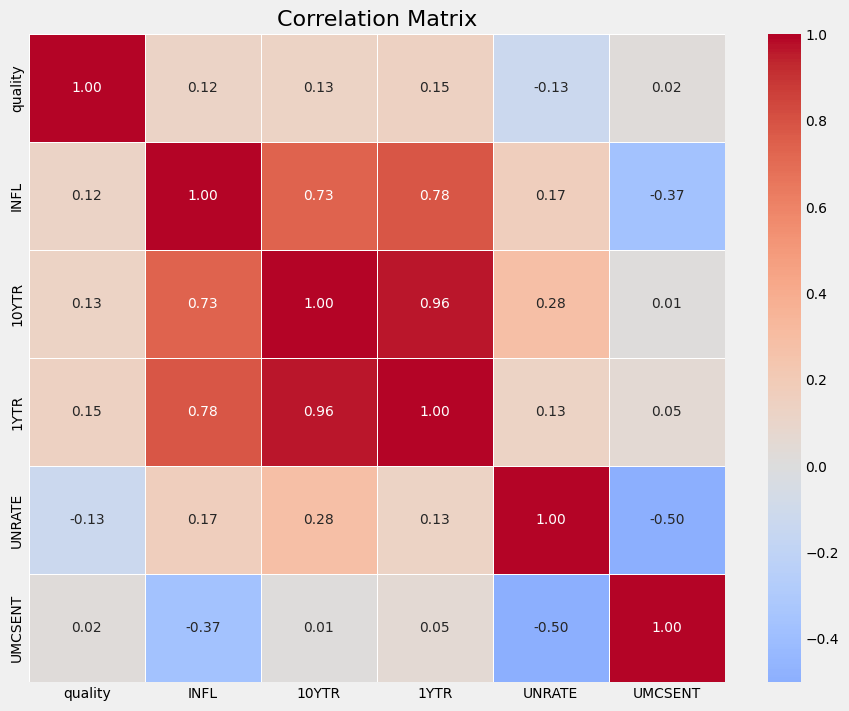

In [30]:
#Visualization of the Correlation Coefficient Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', center=0, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

In [31]:
#We define the performance of the factor with a threshold of 0.02. 
# If the Information Coefficient (IC) of the factor is less than 0.02, it indicates poor factor performance. 
# The data is divided into two groups based on this value, and a T - test is conducted on the macro - economic indicators within the two groups. 
poor = macro_df.query('quality<0.02')
good = macro_df.query('quality>=0.02')
result = []
for i in macro_df.columns[1:]:
    poor_samples = len(poor)
    poor_mean = poor[i].mean()
    poor_std = poor[i].std()

    good_samples = len(good)
    good_mean = good[i].mean()
    good_std = good[i].std()
    stat,pvalue = ss.ttest_ind(poor[i],good[i])

    result.append([i,poor_mean,poor_std,good_mean,good_std,stat,pvalue])
T_test_result = pd.DataFrame(result,columns=['Marco_index','Poor_mean','Poor_std','Good_mean','Good_std','T_stat','Pvalue'])
T_test_result

,Marco_index,Poor_mean,Poor_std,Good_mean,Good_std,T_stat,Pvalue
0,INFL,3.041100,2.142265,3.534403,2.352870,-2.354012,0.018947
1,10YTR,5.189837,3.073104,6.034006,3.512208,-2.731658,0.006518
2,1YTR,3.697663,3.452692,4.883554,3.928530,-3.426225,0.000661
3,UNRATE,6.426087,1.904947,6.019880,1.700283,2.488819,0.013132
4,UMCSENT,85.465217,12.418631,86.288253,13.246921,-0.691084,0.489825


In [32]:
#Define the factor performance with a threshold of 0. 
# If the Information Coefficient (IC) of the factor is less than 0, it means the factor completely fails to perform during that period. 
# Divide the data into two groups according to this value, and perform a T - test on the macro - economic indicators in the two groups.
poor = macro_df.query('quality<0')
good = macro_df.query('quality>=0')
result = []
for i in macro_df.columns[1:]:
    poor_samples = len(poor)
    poor_mean = poor[i].mean()
    poor_std = poor[i].std()

    good_samples = len(good)
    good_mean = good[i].mean()
    good_std = good[i].std()
    stat,pvalue = ss.ttest_ind(poor[i],good[i])

    result.append([i,poor_mean,poor_std,good_mean,good_std,stat,pvalue])
T_test_result = pd.DataFrame(result,columns=['Marco_index','Poor_mean','Poor_std','Good_mean','Good_std','T_stat','Pvalue'])
T_test_result

,Marco_index,Poor_mean,Poor_std,Good_mean,Good_std,T_stat,Pvalue
0,INFL,2.834978,1.957959,3.533002,2.367321,-3.021573,0.002640
1,10YTR,4.880155,2.973446,6.017261,3.466682,-3.338086,0.000905
2,1YTR,3.348915,3.279944,4.831266,3.898607,-3.883937,0.000116
3,UNRATE,6.489147,2.011344,6.056589,1.691636,2.394807,0.016986
4,UMCSENT,85.558140,12.101999,86.140310,13.234397,-0.441789,0.658827


# 6.An Alternative Way to Combine the Factors
    New Strategy to construct：
       According to the IC analysis in Section 2, the three components have a relatively high positive correlation with quality, and there is also a relatively high positive correlation among the three factors. However, judging from the IC results, the three factors still show some differences. For example, the safety factor outperforms the others. Therefore, a dynamic IC weighting method is considered. That is, at each time point, calculate the mean IC of the three factors over the past M months (since the calculation of IC uses the return of the next month, the past M months here refer to the period from T - (M + 1) months to T - 1 months). Use this mean as the factor weight to calculate the composite quality factor. At the same time, to unify the dimensions and reduce the impact of extreme values, when synthesizing the quality factor at each time point, rank the three component factors. After synthesis, standardize the new quality factor. 

# 6.1 Construct a new AQR factor.

In [33]:
M = 240 #Weighting by the Mean IC of the Past M Months
factor_weight = ic_ts[['growth','profit','safety']].rolling(M).mean()
factor_weight = factor_weight.shift(1) #Postpone the time by one month
factor_weight

,growth,profit,safety
1980-01-31,NaN,NaN,NaN
1980-02-29,NaN,NaN,NaN
1980-03-31,NaN,NaN,NaN
1980-04-30,NaN,NaN,NaN
1980-05-30,NaN,NaN,NaN
...,...,...,...
2022-08-31,0.025110,0.024288,0.029109
2022-09-30,0.024769,0.023526,0.028957
2022-10-31,0.024921,0.023748,0.029130
2022-11-30,0.025113,0.023667,0.028751


In [34]:
#Construct a new quality factor.
new_db = pd.DataFrame()
for group in db.groupby('date'):
    date = group[0]
    temp = group[1]
    
    for i in factor_weight:
        temp = temp.sort_values(by=i,ascending=True)
        temp[i] = range(len(temp))
        temp[i] = temp[i] * factor_weight.loc[date,i]
    temp['new_quality'] = temp[['growth','profit','safety']].sum(axis=1)
    temp['new_quality'] = (temp['new_quality'] - temp['new_quality'].mean()) / temp['new_quality'].std()

    new_db = pd.concat([new_db,temp[['quality','new_quality','RET']]],axis=0)
new_db = new_db.sort_index()
new_db

quality  new_quality       RET
id    date                                       
10001 1996-07-31 -0.383315          NaN  0.023437
      1996-08-30 -0.383161          NaN  0.038168
      1996-09-30 -0.867538          NaN  0.041765
      1996-10-31 -0.868512          NaN -0.028571
      1996-11-29 -0.871250          NaN  0.029412
...                    ...          ...       ...
93427 2022-08-31  1.225948     0.719624       NaN
      2022-09-30  1.227387     0.736595       NaN
      2022-10-31  1.231077     0.737178       NaN
      2022-11-30  1.250178     0.749576       NaN
      2022-12-30  1.249023     0.744758       NaN

[652353 rows x 3 columns]

# 6.2 The Comparison of Factor Tests

In [35]:
#Conduct a factor test on the new quality factor.
new_db = new_db.reset_index()
factors = ['quality','new_quality']
datelist = new_db['date'].unique()
datelist.sort()
result = []
for section in datelist[M:]:
    section_data = new_db.query(f'date=="{section}"')
    for factor in factors:
        temp = pd.concat([section_data[factor],section_data['RET']],axis=1).dropna()
        corr,pvalue = ss.spearmanr(temp[factor],temp['RET'])
        result.append([section,factor,corr,pvalue])

rank_ic = pd.DataFrame(result,columns=['section','factor','IC','pvalue'])
new_db = new_db.set_index(['id','date'])

In [36]:
new_summary_ic,new_ic_ts = summarize_IC(rank_ic,factors)
new_summary_ic     #present the relevant statistics 

,factor,IC_mean,IC_std,ICIR,Pvalue_mean
0,quality,0.039277,0.093700,0.419181,0.183698
1,new_quality,0.037574,0.091655,0.409944,0.181444


<Axes: title={'center': 'Cumsum Value of IC'}>

<Figure size 640x480 with 0 Axes>

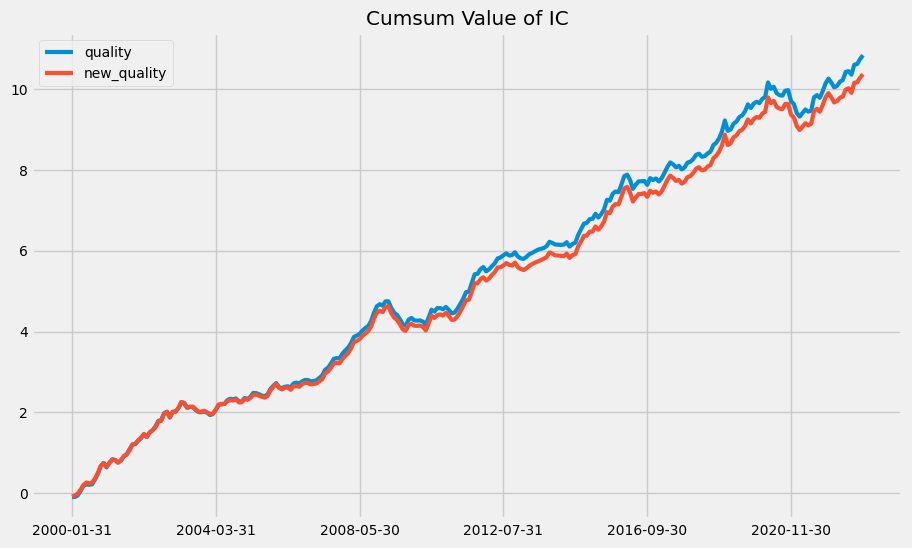

In [37]:
fig = plt.figure()
new_ic_ts.cumsum().plot(figsize=(10,6),
                       title='Cumsum Value of IC')

# 6.3 Backtesting Performance Comparison

In [38]:
#The backtesting results of the new quality factor

result = pd.DataFrame()
ret_summary = pd.DataFrame()

for factor in factors:
    lx_ret, lx_turn, lx_comp, lx_perf = ap.ls_backtesting(new_db[factor], prices['price'], market_cap['market_cap'], 
                                                          start='2005-01-01', end='2022-12-31', 
                                                          frequency=1, t_cost=0.002, N=150, active=0.5)
    
    name = factor
    temp_perf = lx_perf['LS Active']
    temp_perf.index = [x+'(LS Active)' for x in temp_perf.index]
    temp_perf.name = name
    result = pd.concat([result,temp_perf],axis=1)

    temp_ret = lx_ret['LS Active']
    temp_ret.name = name
    ret_summary = pd.concat([ret_summary,temp_ret],axis=1)
result = result.applymap(lambda x:'%.4f'%x)
result

/tmp/ipykernel_4173/4067272451.py:18: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  result = result.applymap(lambda x:'%.4f'%x)


,quality,new_quality
Mean Return(LS Active),0.0690,0.0631
St. Dev.(LS Active),0.0684,0.0680
RR Ratio(LS Active),1.0086,0.9287
% Positive(LS Active),0.6435,0.6204
Worst Month(LS Active),-0.0795,-0.0803
Best Month(LS Active),0.0812,0.0763
Max DrawDown(LS Active),-0.2252,-0.2177


<Axes: title={'center': 'PF Value Of Each Factor '}, xlabel='Time', ylabel='Portfolio Value'>

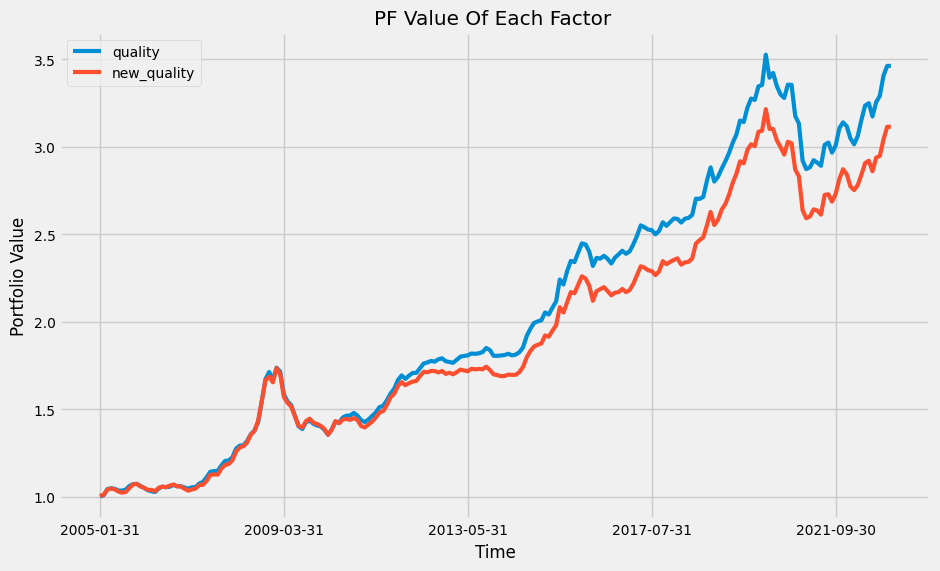

In [39]:
#Compare the portfolio curves of the original quality factor and the new quality factor 
port_values = ret_summary.cumsum().apply(np.exp)

port_values.plot(figsize=(10,6),
                 title='PF Value Of Each Factor ',
                 ylabel='Portfolio Value',
                 xlabel='Time')